# Import data

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from utils import get_train_data_only

df_teams, df_BLUE, df_RED = get_train_data_only()

In [5]:
#How many data points we have
len(df_teams), len(df_BLUE) 

(28256, 141280)

# Feature Engineering

In [4]:
import numpy as np
import pandas as pd

In [1]:
df_b = df_BLUE.groupby('champion_id').count()
df_r = df_RED.groupby('champion_id').count()
df_frequency = pd.DataFrame(df_b.max(axis=1), columns=['champ_id_blue'])
df_frequency['champ_id_red'] = df_r.max(axis=1)
df_frequency.sample(5)

NameError: name 'df_BLUE' is not defined

<AxesSubplot:xlabel='champion_id'>

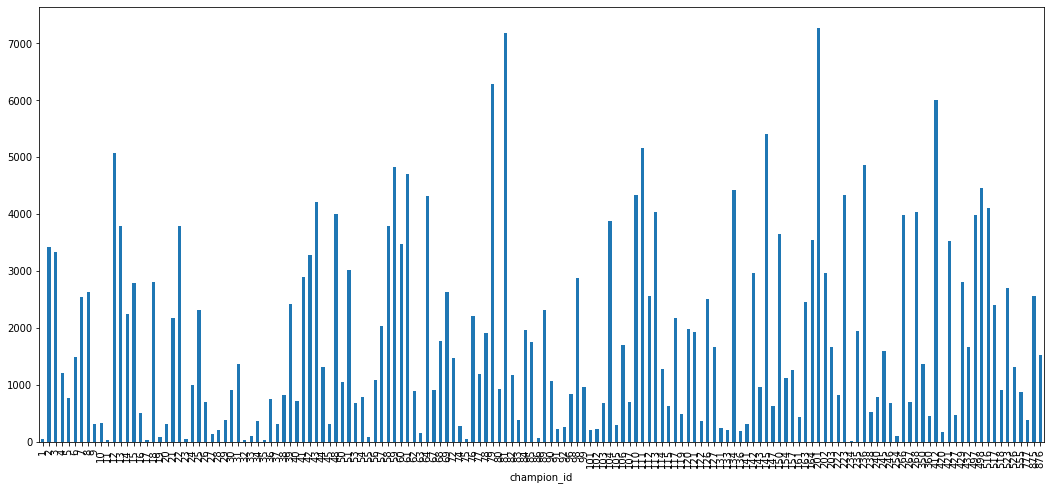

In [6]:
#total times a champion played
df_frequency.sum(axis=1).plot.bar(figsize=(18,8))

In [7]:
min_played = df_frequency.sum(axis=1).min()
df_frequency.sum(axis=1)[df_frequency.sum(axis=1) == min_played]

champion_id
234    9
dtype: int64

In [8]:
max_played = df_frequency.sum(axis=1).max()
df_frequency.sum(axis=1)[df_frequency.sum(axis=1) == max_played]

champion_id
201    7276
dtype: int64

## Synergy between champions in the same team

In [9]:
df_BLUE_lite_synergy = df_BLUE[['champion_id', 'win', 'game_id']]
df_BLUE_lite_synergy

,champion_id,win,game_id
0,36,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
1,5,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
2,69,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
3,81,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
4,25,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
...,...,...,...
141275,41,False,LCK/2019 Season/Summer Season/Scoreboards/Week...
141276,113,False,LCK/2019 Season/Summer Season/Scoreboards/Week...
141277,42,False,LCK/2019 Season/Summer Season/Scoreboards/Week...
141278,15,False,LCK/2019 Season/Summer Season/Scoreboards/Week...


In [10]:
df_RED_lite_synergy = df_RED[['champion_id', 'win', 'game_id']]
df_RED_lite_synergy

,champion_id,win,game_id
0,126,True,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
1,113,True,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
2,142,True,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
3,50,True,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
4,223,True,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
...,...,...,...
141275,85,True,LCK/2019 Season/Summer Season/Scoreboards/Week...
141276,59,True,LCK/2019 Season/Summer Season/Scoreboards/Week...
141277,517,True,LCK/2019 Season/Summer Season/Scoreboards/Week...
141278,81,True,LCK/2019 Season/Summer Season/Scoreboards/Week...


In [11]:
df_result = pd.concat([df_BLUE_lite_synergy, df_RED_lite_synergy])
df_result

,champion_id,win,game_id
0,36,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
1,5,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
2,69,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
3,81,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
4,25,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
...,...,...,...
141275,85,True,LCK/2019 Season/Summer Season/Scoreboards/Week...
141276,59,True,LCK/2019 Season/Summer Season/Scoreboards/Week...
141277,517,True,LCK/2019 Season/Summer Season/Scoreboards/Week...
141278,81,True,LCK/2019 Season/Summer Season/Scoreboards/Week...


In [12]:
df_result['outcome'] = df_result['win']*1
df_result

,champion_id,win,game_id,outcome
0,36,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,0
1,5,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,0
2,69,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,0
3,81,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,0
4,25,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,0
...,...,...,...,...
141275,85,True,LCK/2019 Season/Summer Season/Scoreboards/Week...,1
141276,59,True,LCK/2019 Season/Summer Season/Scoreboards/Week...,1
141277,517,True,LCK/2019 Season/Summer Season/Scoreboards/Week...,1
141278,81,True,LCK/2019 Season/Summer Season/Scoreboards/Week...,1


In [19]:
df_result.index = df_result.game_id
df_result

,champion_id,win,game_id,outcome
game_id,,,,
Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,36,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,0
Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,5,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,0
Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,69,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,0
Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,81,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,0
Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,25,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,0
...,...,...,...,...
LCK/2019 Season/Summer Season/Scoreboards/Week 7 (2)_3_2,85,True,LCK/2019 Season/Summer Season/Scoreboards/Week...,1
LCK/2019 Season/Summer Season/Scoreboards/Week 7 (2)_3_2,59,True,LCK/2019 Season/Summer Season/Scoreboards/Week...,1
LCK/2019 Season/Summer Season/Scoreboards/Week 7 (2)_3_2,517,True,LCK/2019 Season/Summer Season/Scoreboards/Week...,1


In [15]:
game_id_unique = np.unique(df_result.game_id)
len(game_id_unique)

28256

In [16]:
champions_id_unique = np.unique(df_result.champion_id)
champions_id_unique, len(champions_id_unique) 

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  48,  50,  51,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  67,  68,  69,  72,  74,
         75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  89,
         90,  91,  92,  96,  98,  99, 101, 102, 103, 104, 105, 106, 107,
        110, 111, 112, 113, 114, 115, 117, 119, 120, 121, 122, 126, 127,
        131, 133, 134, 136, 141, 142, 143, 145, 147, 150, 154, 157, 161,
        163, 164, 201, 202, 203, 222, 223, 234, 235, 236, 238, 240, 245,
        246, 254, 266, 267, 268, 350, 360, 412, 420, 421, 427, 429, 432,
        497, 498, 516, 517, 518, 523, 526, 555, 777, 875, 876]),
 154)

In [17]:
champions_synergy = pd.DataFrame(np.zeros([len(champions_id_unique), len(champions_id_unique)]), columns=champions_id_unique, index=champions_id_unique)
champions_synergy

,1,2,3,4,5,6,7,8,9,10,...,498,516,517,518,523,526,555,777,875,876
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
from tqdm import tqdm

In [64]:
print(champions_played)

[150, 77, 517, 498, 12, 84, 120, 58, 145, 526]


In [63]:
count = 0
for value in tqdm(game_id_unique[:1000]):
  if count > 800:
    champions_played = list(df_result[df_result.game_id == value].champion_id)
    #print(champions_played)
    win_value = df_result.loc[value]
    #print(int(win_value[win_value.champion_id == champions_played[0]]['outcome']))
    for champion_a in champions_played:
        for champion_b in champions_played:
            if champion_a == champion_b:
                continue
            try:
                outcome = int(win_value[win_value.champion_id == champion_b]['outcome'])
            except TypeError:
                print(win_value.champion_id)
                print(champion_b)
                print(win_value[win_value.champion_id == champion_b]['outcome'])
            #print(outcome)
            
            if outcome == 1:
                champions_synergy.loc[champion_a][champion_b] += 1
                #print('win', champion_a, champion_b, champions_synergy.loc[champion_a][champion_b])
            else:
                champions_synergy.loc[champion_a][champion_b] -= 1
                #print('lost', champion_a, champion_b, champions_synergy.loc[champion_a][champion_b])
    
  count += 1
champions_synergy#.info()#.loc[1][1] += 1

 80%|███████████████████████████████████████████████▍           | 803/1000 [00:00<00:00, 5249.64it/s]

game_id
2020 Mid-Season Cup/Scoreboards/Knockout Stage_1_1    516
2020 Mid-Season Cup/Scoreboards/Knockout Stage_1_1    104
2020 Mid-Season Cup/Scoreboards/Knockout Stage_1_1     38
2020 Mid-Season Cup/Scoreboards/Knockout Stage_1_1    110
2020 Mid-Season Cup/Scoreboards/Knockout Stage_1_1    223
2020 Mid-Season Cup/Scoreboards/Knockout Stage_1_1     58
2020 Mid-Season Cup/Scoreboards/Knockout Stage_1_1     76
2020 Mid-Season Cup/Scoreboards/Knockout Stage_1_1     42
2020 Mid-Season Cup/Scoreboards/Knockout Stage_1_1    110
2020 Mid-Season Cup/Scoreboards/Knockout Stage_1_1    412
Name: champion_id, dtype: int64
110
game_id
2020 Mid-Season Cup/Scoreboards/Knockout Stage_1_1    0
2020 Mid-Season Cup/Scoreboards/Knockout Stage_1_1    1
Name: outcome, dtype: int64
game_id
2020 Mid-Season Cup/Scoreboards/Knockout Stage_1_1    516
2020 Mid-Season Cup/Scoreboards/Knockout Stage_1_1    104
2020 Mid-Season Cup/Scoreboards/Knockout Stage_1_1     38
2020 Mid-Season Cup/Scoreboards/Knockout Stage

game_id
2020 Mid-Season Cup/Scoreboards/Knockout Stage_3_1     62
2020 Mid-Season Cup/Scoreboards/Knockout Stage_3_1    104
2020 Mid-Season Cup/Scoreboards/Knockout Stage_3_1      3
2020 Mid-Season Cup/Scoreboards/Knockout Stage_3_1    110
2020 Mid-Season Cup/Scoreboards/Knockout Stage_3_1    412
2020 Mid-Season Cup/Scoreboards/Knockout Stage_3_1    516
2020 Mid-Season Cup/Scoreboards/Knockout Stage_3_1     64
2020 Mid-Season Cup/Scoreboards/Knockout Stage_3_1    134
2020 Mid-Season Cup/Scoreboards/Knockout Stage_3_1    110
2020 Mid-Season Cup/Scoreboards/Knockout Stage_3_1    412
Name: champion_id, dtype: int64
110
game_id
2020 Mid-Season Cup/Scoreboards/Knockout Stage_3_1    0
2020 Mid-Season Cup/Scoreboards/Knockout Stage_3_1    1
Name: outcome, dtype: int64
game_id
2020 Mid-Season Cup/Scoreboards/Knockout Stage_3_1     62
2020 Mid-Season Cup/Scoreboards/Knockout Stage_3_1    104
2020 Mid-Season Cup/Scoreboards/Knockout Stage_3_1      3
2020 Mid-Season Cup/Scoreboards/Knockout Stage

100%|████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.30it/s]


,1,2,3,4,5,6,7,8,9,10,...,498,516,517,518,523,526,555,777,875,876
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,-6.0,-11.0,-6.0,6.0,3.0,7.0,4.0,-1.0,...,-43.0,-2.0,5.0,0.0,4.0,0.0,-8.0,14.0,-7.0,-7.0
3,0.0,32.0,0.0,6.0,-4.0,-32.0,12.0,-6.0,0.0,-4.0,...,28.0,12.0,20.0,8.0,5.0,0.0,4.0,7.0,-2.0,-4.0
4,0.0,-11.0,-6.0,0.0,0.0,3.0,-7.0,-9.0,4.0,8.0,...,-1.0,13.0,6.0,0.0,6.0,0.0,7.0,0.0,3.0,-12.0
5,0.0,6.0,-4.0,0.0,0.0,41.0,-14.0,-4.0,0.0,0.0,...,-8.0,4.0,8.0,0.0,0.0,0.0,-4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
555,0.0,-8.0,4.0,7.0,4.0,-5.0,4.0,-3.0,0.0,-4.0,...,12.0,-4.0,8.0,-1.0,0.0,0.0,0.0,0.0,-3.0,3.0
777,0.0,-14.0,7.0,0.0,0.0,0.0,0.0,-7.0,0.0,0.0,...,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
875,0.0,7.0,-10.0,-3.0,0.0,0.0,6.0,0.0,0.0,0.0,...,-3.0,7.0,6.0,0.0,-3.0,0.0,3.0,0.0,0.0,2.0


<AxesSubplot:>

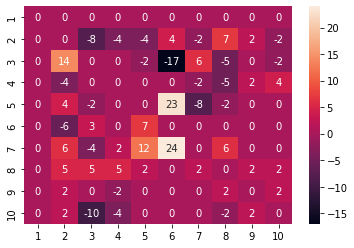

In [39]:
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt

sns.heatmap(champions_synergy.loc[:10, :10], annot=True)#, cmap='RdYlGn_r')
#champions_synergy.style.background_gradient(cmap='Blues')

## Average win rate of the champions against the opposite champions

### Win rate of champions against each of the other team's champion

In [40]:
#available_champions = list(df_frequency.index)
df_BLUE_RED = pd.merge(left=df_BLUE, right=df_RED, left_on= 'game_id', right_on= 'game_id')
df = df_BLUE_RED[['champion_id_x', 'champion_id_y', 'win_x']]#.groupby('champion_id_x').value_counts()
df

,champion_id_x,champion_id_y,win_x
0,36,126,False
1,36,113,False
2,36,142,False
3,36,50,False
4,36,223,False
...,...,...,...
706395,201,85,False
706396,201,59,False
706397,201,517,False
706398,201,81,False


In [41]:
#times that a given champion won or lost against another champion
champion_vs_champion = pd.DataFrame(df.value_counts())
champion_vs_champion

0
champion_id_x champion_id_y win_x     
12            201           True   318
498           145           True   315
412           201           True   292
201           12            False  281
                            True   276
...                                ...
105           14            False    1
                            True     1
              16            True     1
              18            False    1
91            83            True     1

[37444 rows x 1 columns]

In [42]:
champion_vs_champion.loc[(12, 201)]

/tmp/ipykernel_10258/160690174.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  champion_vs_champion.loc[(12, 201)]


,0
win_x,
True,318
False,258


In [43]:
total_champion_vs_champion = pd.DataFrame(df_BLUE_RED[['champion_id_x', 'champion_id_y']].value_counts())
total_champion_vs_champion

,,0
champion_id_x,champion_id_y,
12,201,576
201,12,557
498,145,534
412,201,509
201,412,508
...,...,...
131,10,1
92,106,1
131,9,1


In [44]:
#percentage of times that a champion has lost or won against another champion
rate_champion_vs_champion = champion_vs_champion.div(total_champion_vs_champion)
rate_champion_vs_champion

0
champion_id_x champion_id_y win_x          
1             2             False  0.500000
                            True   0.500000
              3             False  1.000000
              4             False  1.000000
              7             False  1.000000
...                                     ...
876           555           False  0.500000
              777           False  0.533333
                            True   0.466667
              875           True   0.551020
                            False  0.448980

[37444 rows x 1 columns]

In [45]:
rate_champion_vs_champion.loc[(12)]
####win rate per againts a champion against the champion of the other team in the same role
##played with the same role (keep an eye!)

0
champion_id_y win_x          
1             True   0.666667
              False  0.333333
2             True   0.650000
              False  0.350000
3             False  0.529412
...                       ...
777           False  0.500000
875           True   0.707317
              False  0.292683
876           False  0.518182
              True   0.481818

[293 rows x 1 columns]

In [46]:
float(rate_champion_vs_champion.loc[(12, 201, True)])

0.5520833333333334

### Blue Champions average win rate against each of the 5 red champions (later averaged per game_id)

In [47]:
champion_x = list(df_BLUE_RED.champion_id_x)
champion_y = list(df_BLUE_RED.champion_id_y)

column1 = []
column2 = []
column3 = []
column4 = []
column5 = []

for num in range(int(len(champion_x)/5)):
    try:
        column1.append(float(rate_champion_vs_champion.loc[(champion_x[5*num], champion_y[5*num], True)]))
    except:
        column1.append(0)
    try:
        column2.append(float(rate_champion_vs_champion.loc[(champion_x[5*num+1], champion_y[5*num+1], True)]))
    except:    
        column2.append(0)
    try:
        column3.append(float(rate_champion_vs_champion.loc[(champion_x[5*num+2], champion_y[5*num+2], True)]))
    except:
        column3.append(0)
    try:
        column4.append(float(rate_champion_vs_champion.loc[(champion_x[5*num+3], champion_y[5*num+3], True)]))
    except:
        column4.append(0)
    try:
        column5.append(float(rate_champion_vs_champion.loc[(champion_x[5*num+4], champion_y[5*num+4], True)]))
    except:
        column5.append(0)

        
"""This cell returns each blue champion winning rate per 5 of the red team champions"""
win_rate_champion_vs_champion = pd.DataFrame(np.array([column1, column2, column3, column4, column5]).T, columns=['rate_champion_1', 'rate_champion_2', 'rate_champion_3', 'rate_champion_4', 'rate_champion_5'])
win_rate_champion_vs_champion['blue_champ_id'] = df_BLUE_RED.champion_id_x

In [49]:
"""This cell returns each blue champion avergage winning rate for the 5 champions in the red team"""
win_rate_champion_vs_champion.mean(axis=1)

0         6.384466
1         6.382893
2         6.497394
3         6.426222
4         6.424693
            ...   
141275    1.473143
141276    1.440393
141277    1.415992
141278    1.425620
141279    1.447481
Length: 141280, dtype: float64

In [50]:
"""Inlcude the average win rate of every blue champion against the 5 champions in the red team"""
df_banana = pd.merge(df_BLUE, win_rate_champion_vs_champion, left_index=True, right_index=True)
df_banana[['champion_name', 'champion_id', 'rate_champion_1','rate_champion_2','rate_champion_3','rate_champion_4','rate_champion_5']]

,champion_name,champion_id,rate_champion_1,rate_champion_2,rate_champion_3,rate_champion_4,rate_champion_5
0,Dr. Mundo,36,0.363636,0.470588,0.564103,0.434783,0.473684
1,Xin Zhao,5,0.433333,0.450000,0.500000,0.384615,0.529412
2,Cassiopeia,69,0.537037,0.556522,0.515152,0.680000,0.695652
3,Ezreal,81,0.492063,0.584718,0.455000,0.460526,0.565022
4,Morgana,25,0.479167,0.637168,0.506849,0.442623,0.482353
...,...,...,...,...,...,...,...
141275,Gangplank,41,0.689655,0.586667,0.434783,0.538012,0.589744
141276,Sejuani,113,0.550000,0.521277,0.496855,0.490066,0.584158
141277,Corki,42,0.480769,0.488584,0.526882,0.527273,0.472441
141278,Sivir,15,0.524590,0.438017,0.578947,0.472340,0.539823


In [51]:
df_BLUE_win_rate = pd.merge(df_BLUE, pd.DataFrame(win_rate_champion_vs_champion.mean(axis=1)), left_index=True, right_index=True)
df_BLUE_win_rate#[['champion_name', 'champion_id', 0]]

,name,id,role,champion_name,champion_id,gold_15,kills_assists_15,deaths_15,total_gold,total_cs,total_kills,total_monster_kills,total_assists,total_deaths,total_damage_taken,total_damage_dealt,win,side,game_id,0
0,LukasNegro,180733.0,TOP,Dr. Mundo,36,4860.0,4.0,4.0,9920,246,0,1,4,4,27971,114533,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,6.384466
1,Rod,196384.0,JGL,Xin Zhao,5,4508.0,5.0,2.0,9386,181,1,151,4,2,24232,146123,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,6.382893
2,Rakyz,194807.0,MID,Cassiopeia,69,4851.0,1.0,3.0,12262,310,1,28,0,3,21271,182752,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,6.497394
3,Warangelus,203963.0,BOT,Ezreal,81,6362.0,6.0,4.0,12160,280,2,15,4,4,14588,173127,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,6.426222
4,Shadow,212989.0,SUP,Morgana,25,3639.0,6.0,4.0,7527,21,2,0,4,4,13196,40300,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,6.424693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141275,Khan,171549.0,TOP,Gangplank,41,4369.0,4.0,6.0,13628,291,0,8,4,6,28847,272147,False,BLUE,LCK/2019 Season/Summer Season/Scoreboards/Week...,1.473143
141276,Clid,126245.0,JGL,Sejuani,113,4704.0,5.0,4.0,10770,150,2,123,3,4,25724,123159,False,BLUE,LCK/2019 Season/Summer Season/Scoreboards/Week...,1.440393
141277,Faker,158918.0,MID,Corki,42,5234.0,3.0,2.0,15381,384,1,38,2,2,16005,259670,False,BLUE,LCK/2019 Season/Summer Season/Scoreboards/Week...,1.415992
141278,Teddy,200789.0,BOT,Sivir,15,5448.0,4.0,2.0,16986,426,2,39,2,2,14173,321584,False,BLUE,LCK/2019 Season/Summer Season/Scoreboards/Week...,1.425620


In [52]:
df_BLUE_mean_win_rate = df_BLUE_win_rate[['game_id', 0]].groupby('game_id').mean()
df_BLUE_mean_win_rate.reset_index(level=0, inplace=True)
df_BLUE_mean_win_rate['champion_vs_champion_mean_win_rate'] = df_BLUE_mean_win_rate[0]
df_BLUE_mean_win_rate.drop(0, axis=1, inplace=True)
df_BLUE_mean_win_rate.head(10)

,game_id,champion_vs_champion_mean_win_rate
0,2016 International Wildcard Invitational/Score...,37.604190
1,2016 International Wildcard Invitational/Score...,18.123818
2,2016 International Wildcard Invitational/Score...,13.925812
3,2016 International Wildcard Invitational/Score...,13.126628
4,2016 International Wildcard Invitational/Score...,13.978497
5,2016 International Wildcard Invitational/Score...,2.460013
6,2016 International Wildcard Invitational/Score...,0.798985
7,2016 International Wildcard Invitational/Score...,69.132323
8,2016 International Wildcard Invitational/Score...,58.794709
9,2016 International Wildcard Invitational/Score...,1.804435


## Average win rate of the champions against the opposite role champions (?)
What does opposite role mean?

In [ ]:
df_BLUE[df_BLUE.role == 'MID']

# ML model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn import set_config; set_config(display='diagram')


# Impute then Scale for numerical variables: 
num_transformer = make_pipeline(
                    SimpleImputer(strategy = 'mean'),
                    MinMaxScaler())

# Encode categorical variables
cat_transformer = OneHotEncoder(sparse = False)#, handle_unknown='ignore')

# Paralellize "num_transformer" and "One hot encoder"
preproc = make_column_transformer(
    (num_transformer, make_column_selector(dtype_include=['float64'])),
    (cat_transformer, make_column_selector(dtype_include=['object','bool'])),
    remainder='passthrough')

#add model
pipe = make_pipeline(preproc, LogisticRegression(solver='liblinear'))
pipe

In [ ]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit(df_normalized_teams.winner).transform(df_normalized_teams.winner)
X_pre = df_BLUE.drop(['name', 'id', 'win', 'champion_id', 'side'], axis=1).groupby('game_id').sum()
X = X_pre

In [ ]:
X.info()

In [ ]:
df_BLUE.info()

In [ ]:
# Train pipeline
pipe.fit(X_train,y_train)

# Score model
pipe.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross validate pipeline
cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy').mean()

In [ ]:
# Check predictions
pipe.predict(X_test.iloc[0:5]), y_test[0:5]

In [ ]:
from sklearn import metrics

predicted = pipe.predict(X_test)
print(metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted)) 

In [ ]:
np.unique(predicted)

In [ ]:
model = pipe[-1]

In [ ]:
model.coef_